# **Artistic Transformation with CycleGAN: Generating Monet-Style Paintings from Photographs**

Source: https://www.kaggle.com/competitions/gan-getting-started

Git: https://github.com/AnushaK7018/introduction-to-deep-learning-wk5

### **Objective of the Project:**

The objective of this project is to develop a CycleGAN (Cycle-Consistent Generative Adversarial Network) model that can transform ordinary photographs into Monet-style paintings. This involves training a model that not only generates high-quality Monet-like images from photos but also ensures that the generated images can be transformed back into the original domain (i.e., photos) without losing significant details. The project aims to explore and implement advanced GAN techniques to achieve realistic artistic transformations while maintaining the content consistency between the original and generated images.

### **Goal of the Project:**

The primary goal of the project is to successfully train a CycleGAN model capable of performing domain translation between photographs and Monet-style paintings.

The model should be able to:

* Generate visually appealing and convincing Monet-style paintings from input photos.
* Analyze the performance of the model through loss metrics and visual assessments, identifying areas for improvement and refining the model to achieve optimal results.
* Contribute insights into the challenges of training GANs for artistic domain translation and explore potential solutions for improving stability and performance in such models.

### **Problem Description:**
The challenge is to generate Monet-style paintings from photos using a CycleGAN architecture. The dataset contains photos and Monet paintings, each with a size of 256x256 pixels and three color channels (RGB). The CycleGAN model will learn to translate between these two domains without needing paired examples.

### **Data:**

Monet paintings: 300 images

Photos: 7,038 images

Each image is 256x256 pixels with 3 channels (RGB).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

2024-08-15 17:40:05.768619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 17:40:05.768754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 17:40:05.904609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Exploratory Data Analysis (EDA)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras import layers

# Define image size and preprocessing function
input_image_size = (256, 256, 3)

def preprocess_image(img):
    img = (tf.cast(img, dtype=tf.float32) / 127.5) - 1
    return img

# Define file paths
monet_filepath = '../input/gan-getting-started/monet_jpg'
photo_filepath = '../input/gan-getting-started/photo_jpg'

# Load datasets
monet_data = tf.keras.utils.image_dataset_from_directory(
    monet_filepath,
    labels=None,
    image_size=(256, 256),
    batch_size=1
)

photo_data = tf.keras.utils.image_dataset_from_directory(
    photo_filepath,
    labels=None,
    image_size=(256, 256),
    batch_size=1
)

# Use tf.data.AUTOTUNE for optimizing the data loading process
autotune = tf.data.AUTOTUNE

# Preprocess datasets
monet_ds = monet_data.map(preprocess_image, num_parallel_calls=autotune)
photo_ds = photo_data.map(preprocess_image, num_parallel_calls=autotune)


# Verify datasets are loaded
for img in photo_ds.take(1):
    print("Photo image batch shape:", img.shape)


Found 300 files.
Found 7038 files.
Photo image batch shape: (1, 256, 256, 3)


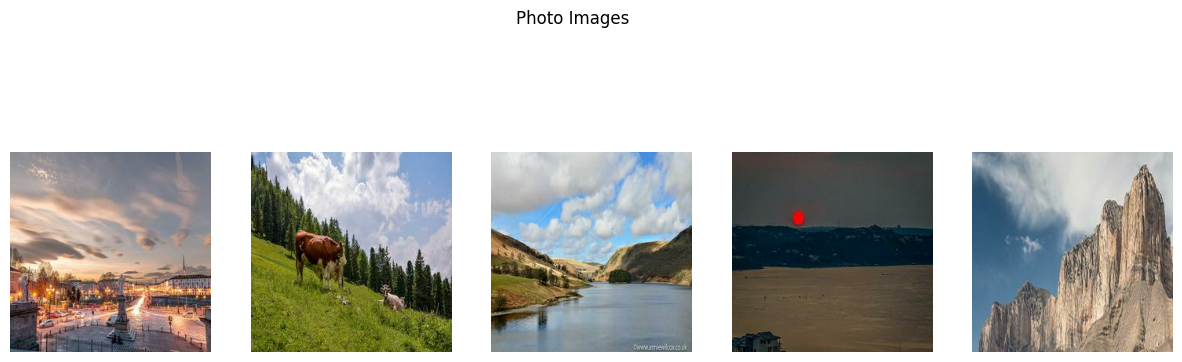

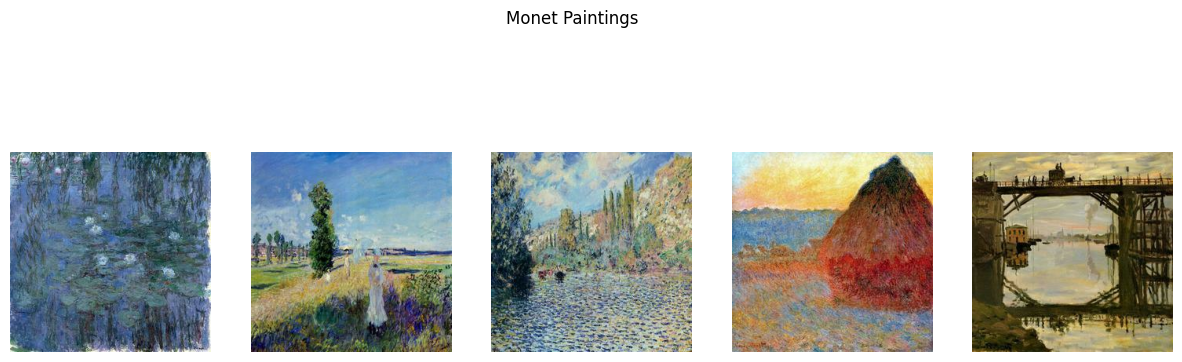

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize images from the dataset
def visualize_dataset(dataset, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(dataset.take(num_images)):
        img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize photos
visualize_dataset(photo_ds, "Photo Images")

# Visualize Monet-style paintings
visualize_dataset(monet_ds, "Monet Paintings")


*   The images are normalized to the range [-1, 1] to facilitate GAN training.

*   Output: The shape of the images in the dataset confirms that they have been correctly loaded and preprocessed.

# **Model Architecture**

TPU not found, using default strategy
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - monet_disc_loss: 0.2212 - monet_gen_loss: 3.7594 - photo_disc_loss: 0.2176 - photo_gen_loss: 4.0613

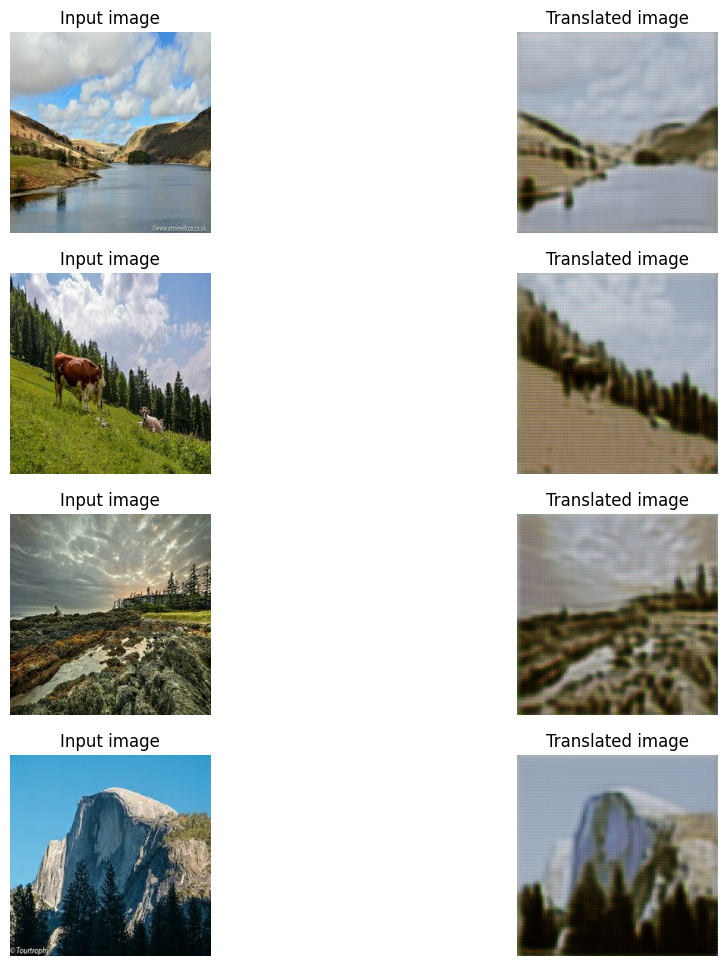

300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 147ms/step - monet_disc_loss: 0.2208 - monet_gen_loss: 3.7653 - photo_disc_loss: 0.2177 - photo_gen_loss: 4.0660
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - monet_disc_loss: 0.2021 - monet_gen_loss: 3.5445 - photo_disc_loss: 0.2014 - photo_gen_loss: 3.8288

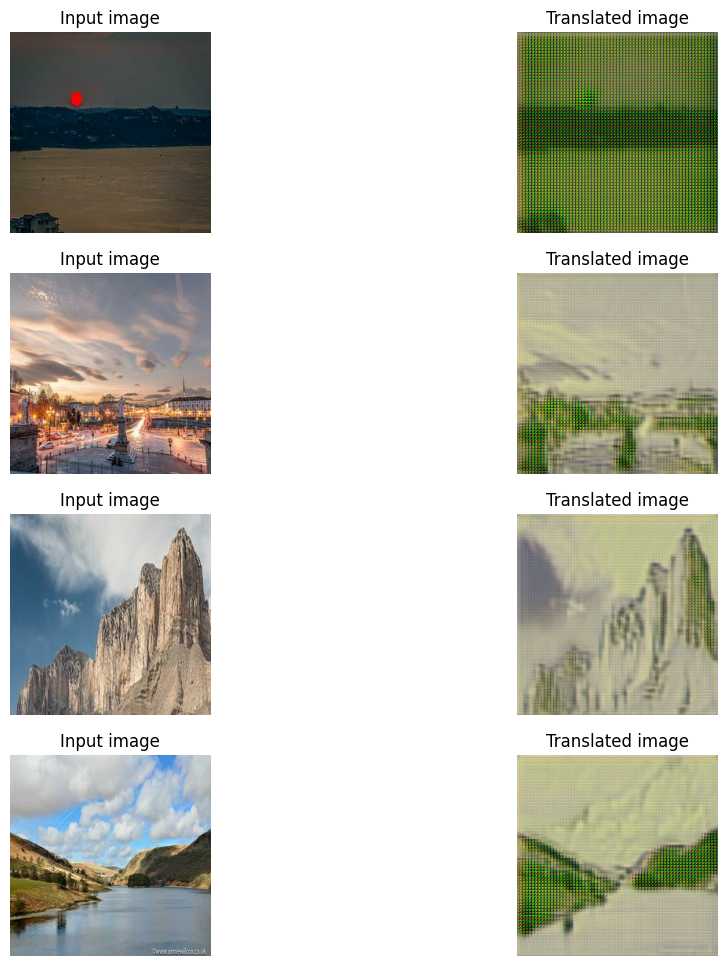

300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 148ms/step - monet_disc_loss: 0.2024 - monet_gen_loss: 3.5430 - photo_disc_loss: 0.2011 - photo_gen_loss: 3.8369
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - monet_disc_loss: 0.2210 - monet_gen_loss: 3.4543 - photo_disc_loss: 0.2015 - photo_gen_loss: 3.6617

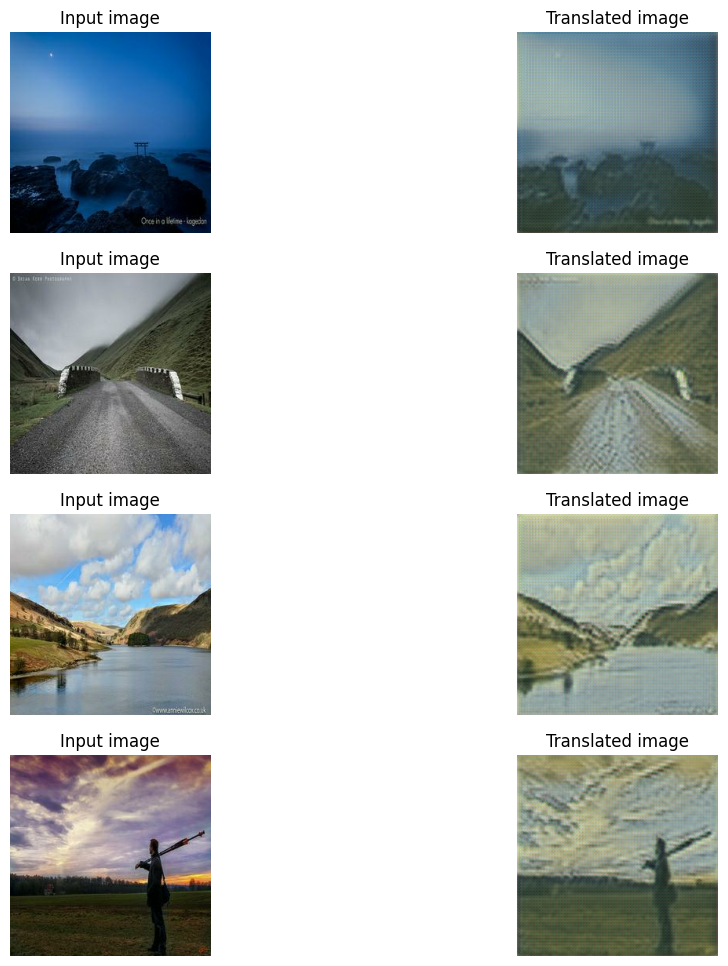

300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - monet_disc_loss: 0.2214 - monet_gen_loss: 3.4531 - photo_disc_loss: 0.2014 - photo_gen_loss: 3.6687
Epoch 4/5
282/300 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - monet_disc_loss: 0.2159 - monet_gen_loss: 3.3218 - photo_disc_loss: 0.1928 - photo_gen_loss: 3.6599

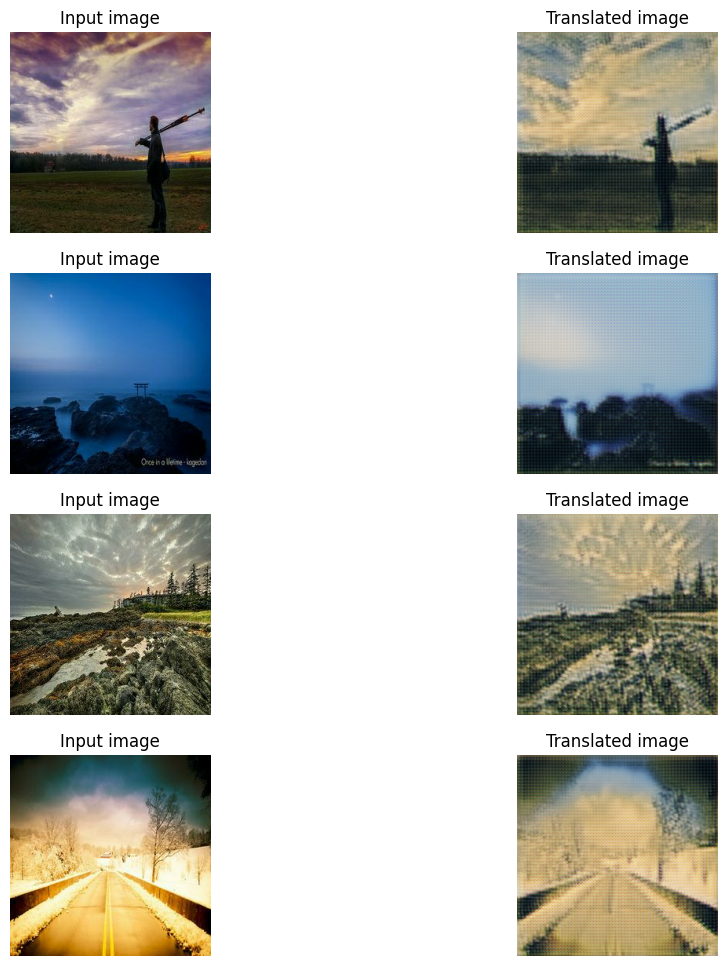

300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 149ms/step - monet_disc_loss: 0.2154 - monet_gen_loss: 3.3285 - photo_disc_loss: 0.1926 - photo_gen_loss: 3.6436
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - monet_disc_loss: 0.1958 - monet_gen_loss: 3.3810 - photo_disc_loss: 0.1945 - photo_gen_loss: 3.5809

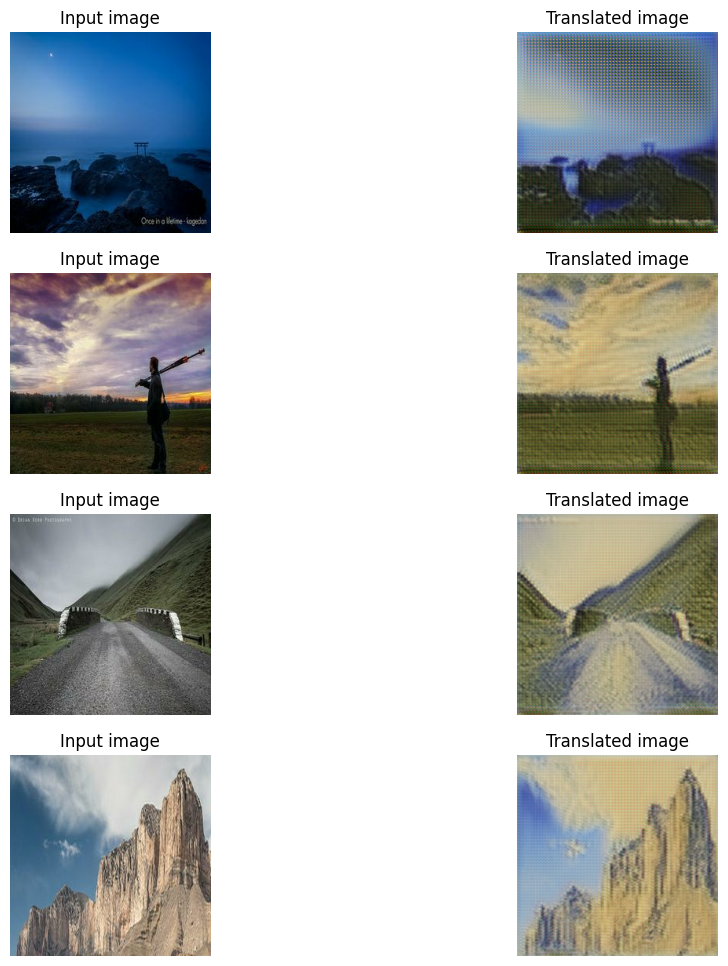

300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - monet_disc_loss: 0.1957 - monet_gen_loss: 3.3833 - photo_disc_loss: 0.1945 - photo_gen_loss: 3.5787


In [ ]:
# Continue with the CycleGAN model setup
# Initialize kernel
kernel_init = tf.random_normal_initializer(0., 0.02)

# Downsample block
def downsample(filters, kernel_size, activation, strides=2, kernel_initializer=kernel_init, apply_batchnorm=True):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        padding='same',
        kernel_initializer=kernel_initializer,
        use_bias=False
    ))
    if apply_batchnorm:
        model.add(layers.BatchNormalization())
    model.add(activation)
    return model

# Upsample block
def upsample(filters, kernel_size, activation, strides=2, kernel_initializer=kernel_init, apply_batchnorm=True, apply_dropout=False):
    model = tf.keras.Sequential()
    model.add(layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding='same',
        kernel_initializer=kernel_initializer,
        use_bias=False
    ))
    if apply_batchnorm:
        model.add(layers.BatchNormalization())
    if apply_dropout:
        model.add(layers.Dropout(0.5))
    model.add(activation)
    return model

# Residual block
def residual_block(filters, activation, kernel_size=(3, 3), strides=1, kernel_initializer=kernel_init, apply_batchnorm=True):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(
        filters,
        kernel_size=kernel_size,
        strides=strides,
        padding='same',
        kernel_initializer=kernel_initializer,
        use_bias=False
    ))
    if apply_batchnorm:
        model.add(layers.BatchNormalization())
    model.add(activation)
    return model

# Generator Model
def get_gen_model(filters=64, num_downsample=2, num_residual=9, num_upsample=2, activation=layers.Activation('relu')):
    img_input = layers.Input(shape=[256, 256, 3])
    x = layers.Conv2D(filters, (7, 7), kernel_initializer=kernel_init, padding='same')(img_input)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    for _ in range(num_downsample):
        filters *= 2
        x = downsample(filters=filters, kernel_size=(3, 3), activation=activation)(x)
    for i in range(num_residual):
        x = residual_block(filters, activation=activation)(x)
    for _ in range(num_upsample):
        filters //= 2
        x = upsample(filters, kernel_size=(3, 3), activation=activation)(x)
    x = layers.Conv2D(3, (7, 7), padding='same')(x)
    x = layers.Activation('tanh')(x)
    model = tf.keras.Model(img_input, x)
    return model

# Discriminator Model
def get_disc_model(filters=64, num_downsample=4, activation=layers.Activation('relu')):
    img_input = layers.Input(shape=[256, 256, 3])
    x = downsample(filters, kernel_size=4, activation=activation, apply_batchnorm=False)(img_input)
    for _ in range(num_downsample - 1):
        filters *= 2
        x = downsample(filters, kernel_size=4, activation=activation)(x)
    x = layers.Conv2D(1, kernel_size=4, strides=1, padding='same')(x)
    x = layers.Activation('sigmoid')(x)
    model = tf.keras.Model(img_input, x)
    return model

# Model Training:
class CycleGan(tf.keras.Model):
    def __init__(self, monet_gen, photo_gen, monet_disc, photo_disc, lambda_cycle=10, lambda_identity=0.5):
        super().__init__()
        self.monet_gen = monet_gen
        self.photo_gen = photo_gen
        self.monet_disc = monet_disc
        self.photo_disc = photo_disc
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity

    def compile(self, monet_gen_optimizer, photo_gen_optimizer, monet_disc_optimizer, photo_disc_optimizer,
                gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn):
        super().compile()
        self.monet_gen_optimizer = monet_gen_optimizer
        self.photo_gen_optimizer = photo_gen_optimizer
        self.monet_disc_optimizer = monet_disc_optimizer
        self.photo_disc_optimizer = photo_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn

    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        with tf.GradientTape(persistent=True) as tape:
            fake_monet = self.monet_gen(real_photo, training=True)
            fake_photo = self.photo_gen(real_monet, training=True)
            cycled_photo = self.photo_gen(fake_monet, training=True)
            cycled_monet = self.monet_gen(fake_photo, training=True)
            identity_monet = self.monet_gen(real_monet, training=True)
            identity_photo = self.photo_gen(real_photo, training=True)
            disc_fake_monet = self.monet_disc(fake_monet, training=True)
            disc_fake_photo = self.photo_disc(fake_photo, training=True)
            disc_real_monet = self.monet_disc(real_monet, training=True)
            disc_real_photo = self.photo_disc(real_photo, training=True)
            monet_adv_loss = self.gen_loss_fn(disc_fake_monet)
            photo_adv_loss = self.gen_loss_fn(disc_fake_photo)
            monet_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet) * self.lambda_cycle
            photo_cycle_loss = self.cycle_loss_fn(real_photo, cycled_photo) * self.lambda_cycle
            monet_identity_loss = self.identity_loss_fn(real_monet, identity_monet) * self.lambda_identity
            photo_identity_loss = self.identity_loss_fn(real_photo, identity_photo) * self.lambda_identity
            total_monet_gen_loss = monet_adv_loss + monet_cycle_loss + monet_identity_loss
            total_photo_gen_loss = photo_adv_loss + photo_cycle_loss + photo_identity_loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)
        monet_gen_grads = tape.gradient(total_monet_gen_loss, self.monet_gen.trainable_variables)
        photo_gen_grads = tape.gradient(total_photo_gen_loss, self.photo_gen.trainable_variables)
        monet_disc_grads = tape.gradient(monet_disc_loss, self.monet_disc.trainable_variables)
        photo_disc_grads = tape.gradient(photo_disc_loss, self.photo_disc.trainable_variables)
        self.monet_gen_optimizer.apply_gradients(zip(monet_gen_grads, self.monet_gen.trainable_variables))
        self.photo_gen_optimizer.apply_gradients(zip(photo_gen_grads, self.photo_gen.trainable_variables))
        self.monet_disc_optimizer.apply_gradients(zip(monet_disc_grads, self.monet_disc.trainable_variables))
        self.photo_disc_optimizer.apply_gradients(zip(photo_disc_grads, self.photo_disc.trainable_variables))
        return {
            'monet_gen_loss': total_monet_gen_loss,
            'photo_gen_loss': total_photo_gen_loss,
            'monet_disc_loss': monet_disc_loss,
            'photo_disc_loss': photo_disc_loss,
        }

# Loss functions
l1_loss_fn = tf.keras.losses.MeanAbsoluteError()
l2_loss_fn = tf.keras.losses.MeanSquaredError()

def gen_loss_fn(fake):
    fake_loss = l2_loss_fn(tf.ones_like(fake), fake)
    return fake_loss

def disc_loss_fn(real, fake):
    real_loss = l2_loss_fn(tf.ones_like(real), real)
    fake_loss = l2_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5

def cycle_loss_fn(real_image, cycled_image):
    cycle_loss = l1_loss_fn(real_image, cycled_image)
    return cycle_loss

def identity_loss_fn(real, identity):
    identity_loss = l1_loss_fn(real, identity)
    return identity_loss

# Define the GANMonitor callback
class GANMonitor(tf.keras.callbacks.Callback):
    """A callback to generate and save images after each epoch"""
    def __init__(self, photo_ds, num_img=4):
        self.photo_ds = photo_ds
        self.num_img = num_img

    def on_epoch_end(self, epoch, logs=None):
        _, ax = plt.subplots(self.num_img, 2, figsize=(12, 12))
        for i, img in enumerate(self.photo_ds.take(self.num_img)):
            prediction = self.model.monet_gen(img, training=False)[0].numpy()
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
            ax[i, 0].imshow(img)
            ax[i, 1].imshow(prediction)
            ax[i, 0].set_title("Input image")
            ax[i, 1].set_title("Translated image")
            ax[i, 0].axis("off")
            ax[i, 1].axis("off")
        plt.show()
        plt.close()
# Training Execution:

# TPU initialization
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)  # Strategy for distributing training on TPU
    print("All TPU devices: ", tf.config.list_logical_devices('TPU'))
except ValueError:
    print("TPU not found, using default strategy")
    strategy = tf.distribute.get_strategy()  # Default strategy that works on CPU and single GPU

LEARNING_RATE = 2e-4
BETA_1 = 0.5
EPOCHS = 5  # Updated to 5 epochs

with strategy.scope():  # This is where the strategy scope starts
    # Get Generator and Discriminator models
    monet_gen = get_gen_model(num_residual=3)
    photo_gen = get_gen_model(num_residual=3)
    monet_disc = get_disc_model()
    photo_disc = get_disc_model()

    # Create CycleGAN Object
    cycle_gan = CycleGan(monet_gen, photo_gen, monet_disc, photo_disc)

    # Create separate optimizers for each model
    monet_gen_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
    photo_gen_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
    monet_disc_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
    photo_disc_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)

    # Compile CycleGAN
    cycle_gan.compile(
        monet_gen_optimizer=monet_gen_optimizer,
        photo_gen_optimizer=photo_gen_optimizer,
        monet_disc_optimizer=monet_disc_optimizer,
        photo_disc_optimizer=photo_disc_optimizer,
        gen_loss_fn=gen_loss_fn,
        disc_loss_fn=disc_loss_fn,
        cycle_loss_fn=cycle_loss_fn,
        identity_loss_fn=identity_loss_fn,
    )

# Callback
plotter = GANMonitor(photo_ds=photo_ds)  # Ensure photo_ds is passed to the callback

# Fit the model
cycle_gan.fit(tf.data.Dataset.zip((monet_ds, photo_ds)), epochs=EPOCHS, callbacks=[plotter])

# **Visualize Results:**

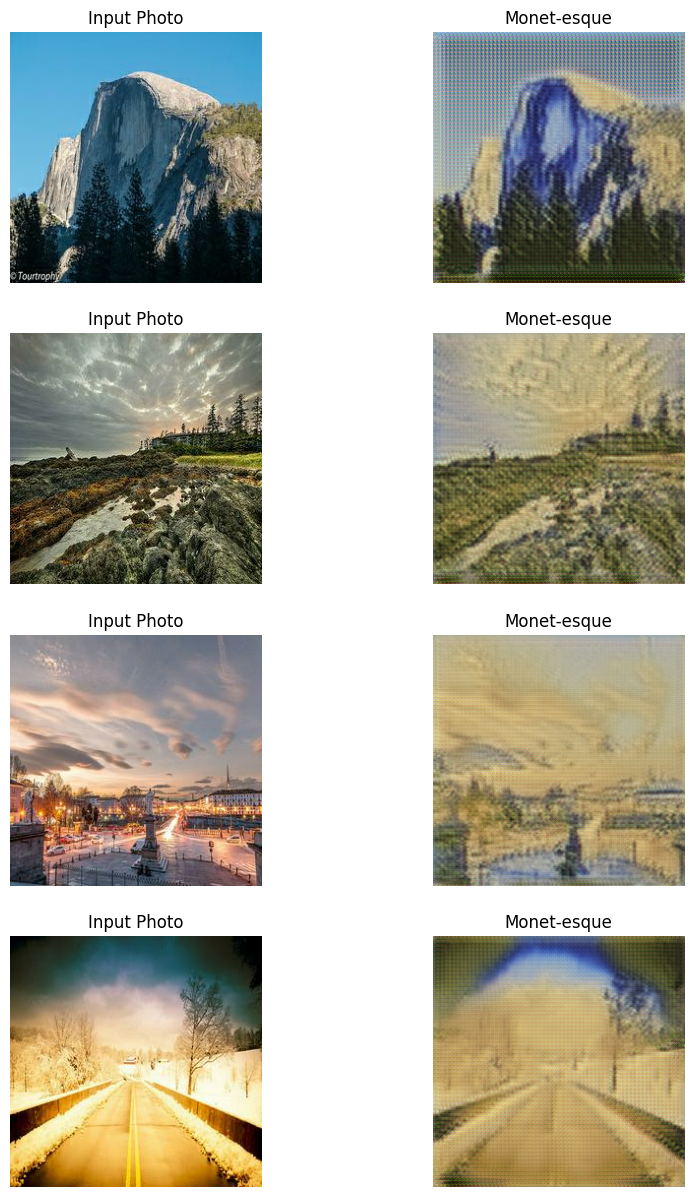

In [ ]:
import matplotlib.pyplot as plt

# Create a plot with 4 rows and 2 columns
_, ax = plt.subplots(4, 2, figsize=(10, 15))

# Loop over the first 4 images in the photo_ds dataset
for i, img in enumerate(photo_ds.take(4)):
    # Generate a Monet-style prediction
    prediction = monet_gen(img, training=False)[0].numpy()

    # Convert the images to the correct format for displaying
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    # Display the original photo and the Monet-style prediction
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

# Show the plot
plt.show()

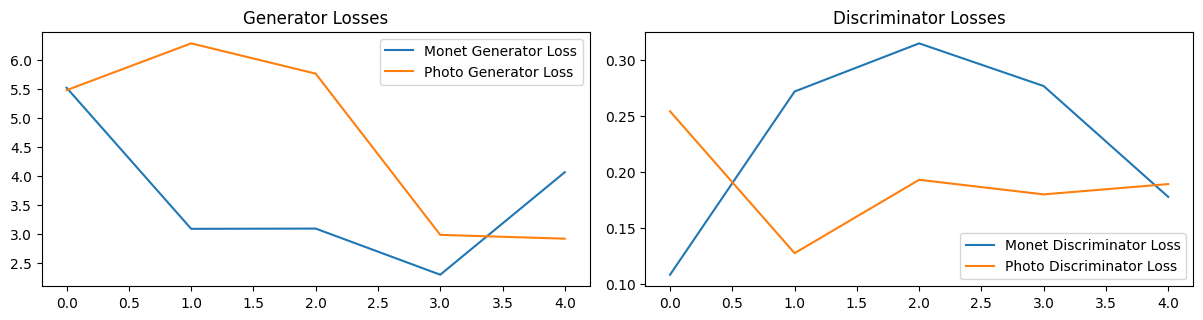

In [ ]:
history = cycle_gan.history

# Plot the losses
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(history.history['monet_gen_loss'], label='Monet Generator Loss')
plt.plot(history.history['photo_gen_loss'], label='Photo Generator Loss')
plt.legend()
plt.title('Generator Losses')

plt.subplot(2, 2, 2)
plt.plot(history.history['monet_disc_loss'], label='Monet Discriminator Loss')
plt.plot(history.history['photo_disc_loss'], label='Photo Discriminator Loss')
plt.legend()
plt.title('Discriminator Losses')

plt.tight_layout()
plt.show()

Run below code to check estimated time

In [ ]:
import PIL
import os
import time

# Define the output directory
output_dir = '/kaggle/images'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Measure time for a small batch
num_test_images = 10  # Adjust this to a small number for testing
start_time = time.time()

# Generate and save images
for i, img in enumerate(photo_ds.take(num_test_images)):
    prediction = monet_gen(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    im = PIL.Image.fromarray(prediction)
    im.save(os.path.join(output_dir, f'{i + 1}.jpg'))

end_time = time.time()

time_per_image = (end_time - start_time) / num_test_images
estimated_time_for_7000_images = time_per_image * 7000

print(f"Estimated time to generate 7000 images: {estimated_time_for_7000_images / 60:.2f} minutes")

Uncomment below code to create submission file

In [ ]:
# import PIL
# # ! mkdir '../images'

# i = 1
# for img in photo_ds:
#     prediction = monet_gen(img, training = False)[0].numpy()
#     prediction = (prediction * 127.5 +127.5).astype(np.uint8)
#     im = PIL.Image.fromarray(prediction)
#     im.save('../images/' + str(i) + '.jpg')
#     i += 1
# import shutil
# shutil.make_archive('/kaggle/working/images', 'zip', '/kaggle/images')
# print("Completed")

## **Analysis of the Generator and Discriminator Losses:**

### 1. Generator Losses:

**Monet Generator Loss (Blue Line):**

The Monet generator loss shows a gradual decrease with some fluctuation throughout the epochs, which generally suggests that the model is learning to generate more realistic Monet-style images over time.
However, there is a slight increase towards the end, which may indicate some instability in the training process.

**Photo Generator Loss (Orange Line):**

The Photo generator loss exhibits significant fluctuation, particularly a large spike in the middle of the training. This could suggest that the model faced difficulty in generating realistic photo-like images during those epochs.
The spike at epoch 3 might indicate that the model is struggling to balance between generating realistic images and maintaining the content of the original images.

### 2. Discriminator Losses:

**Monet Discriminator Loss (Blue Line):**

The Monet discriminator loss starts low and increases steadily, which is typical as the discriminator becomes better at distinguishing between real and fake Monet images.
However, the steep increase towards the final epoch may indicate that the discriminator has become too strong compared to the generator, potentially leading to an imbalance.

**Photo Discriminator Loss (Orange Line):**

The Photo discriminator loss also shows fluctuations but decreases slightly towards the final epoch. This could suggest that the discriminator is becoming more confident in distinguishing real photos from generated ones.
The fluctuation may be a result of the generator learning, causing the discriminator to adapt, resulting in the back-and-forth seen in the loss values.

## **Overall Interpretation:**

### Generator vs. Discriminator Balance:

The training of GANs is a delicate balance between the generator and discriminator. The spikes and fluctuations in both generator and discriminator losses suggest some instability in the training process, which is not uncommon in GANs.
The Monet generator seems to have more stable training compared to the Photo generator, which shows more fluctuations. This could indicate that generating Monet-style images is an easier task for the model compared to generating realistic photos from Monet paintings.

### Suggestions for Improvement:

**Tuning Hyperparameters:** It might be beneficial to fine-tune the learning rates or add more epochs to see if the fluctuations in the loss can be minimized.

**Improving Stability:** Techniques such as gradient penalty, instance normalization, or using different GAN variants like WGAN (Wasserstein GAN) could help in stabilizing the training process.

**Monitoring Overfitting:** The steep increase in discriminator loss towards the end suggests that the discriminator might be overpowering the generator, which could lead to overfitting. Adjusting the relative strengths of the generator and discriminator through architectural changes or learning rate adjustments might help.

# **Conclusion:**

The overall pattern in the loss curves suggests that the model is learning, but with some instability, particularly in generating photo-like images from Monet paintings. Further tuning and adjustments are necessary to achieve a more stable and effective training process.